In [32]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14) 

In [2]:
from scipy import linalg, optimize
from scipy.interpolate import interp1d

In [4]:
np.set_printoptions(precision=2, suppress=True)

In [6]:
data = np.genfromtxt("JANAF_CH4.txt", 
                  delimiter="\t", # TAB 分隔
                  skip_header=1,     # 忽略首行
                  names=True,     # 读入属性
                  missing_values="INFINITE",  # 缺失值
                  filling_values=np.inf)      # 填充缺失值

In [18]:
#显示部分的数据
for row in data[0:7]:
    print("{0}\t{1}".format(row['TK'],row['Cp']))
print("...\t...")

0.0	0.0
100.0	33.258
200.0	33.473
250.0	34.216
298.15	35.639
300.0	35.708
350.0	37.874
...	...


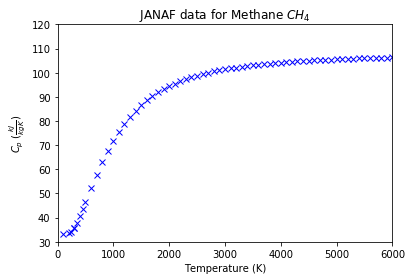

In [25]:
p = plt.plot(data['TK'], data['Cp'], 'bx')
t = plt.title("JANAF data for Methane $CH_4$")
a = plt.axis([0, 6000, 30, 120])
x = plt.xlabel("Temperature (K)")
y = plt.ylabel(r"$C_p$ ($\frac{kJ}{kg K}$)")
plt.show()


In [31]:
#一维插值函数
#scipy.interpolate.interp1d
sp.interpolate.interp1d?

In [32]:
ch4_cp = sp.interpolate.interp1d(data['TK'],data['Cp'])

In [37]:
#可以查看对应位置的插值
ch4_cp([500,500.1,600])

array([ 46.34,  46.35,  52.23])

In [51]:
a = np.arange(0,6000,1)

In [52]:
ch4_cp(a)

array([   0.  ,    0.33,    0.67, ...,  106.3 ,  106.3 ,  106.31])

In [54]:
#默认情况下，输入值要在插值允许的范围内，否则插值会报错：
ch4_cp(8752)

ValueError: A value in x_new is above the interpolation range.

In [56]:
#但我们可以通过参数设置允许超出范围的值存在：
ch4_cp = sp.interpolate.interp1d(data['TK'], data['Cp'], 
                  bounds_error=False)

In [57]:
#不过由于超出范围，所以插值的输出是非法值：
ch4_cp(8752)

array(nan)

In [58]:
#可以使用指定值替代这些非法值：
ch4_cp = sp.interpolate.interp1d(data['TK'], data['Cp'], 
                  bounds_error=False, fill_value=-999.25)

In [59]:
ch4_cp(8752)

array(-999.25)

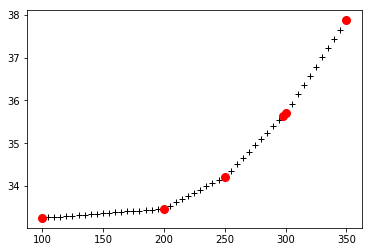

In [63]:
#我们来看看线性插值的特点
T = np.arange(100,355,5)
plt.plot(T,ch4_cp(T),'+k')
plt.plot(data['TK'][1:7], data['Cp'][1:7], 'ro', markersize=8)

In [64]:
#多项式插值
#其实线性插值就是一次插值

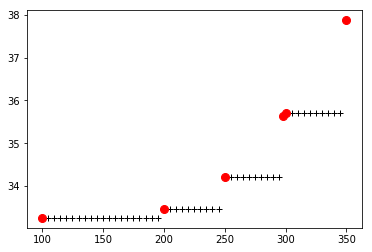

In [7]:
T = np.arange(100,355,5)
cp_ch4 = interp1d(data['TK'],data['Cp'],kind = 'zero')#零阶插值
p = plt.plot(T,cp_ch4(T),'k+')
p  = plt.plot(data['TK'][1:7], data['Cp'][1:7], 'ro', markersize=8)

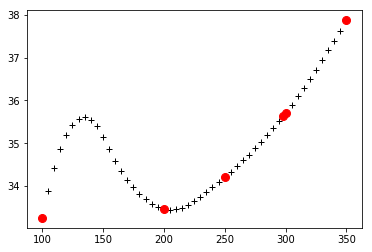

In [8]:
#二次插值,两点之间拟合二次函数曲线
T = np.arange(100,355,5)
cp_ch4 = interp1d(data['TK'],data['Cp'],kind = 'quadratic')
p = plt.plot(T,cp_ch4(T),'k+')
p  = plt.plot(data['TK'][1:7], data['Cp'][1:7], 'ro', markersize=8)

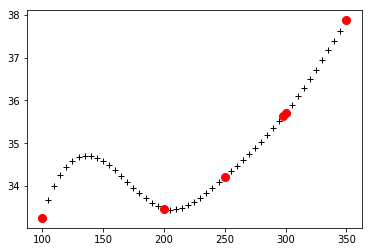

In [9]:
#三次插值,两点之间拟合三次函数曲线
T = np.arange(100,355,5)
cp_ch4 = interp1d(data['TK'],data['Cp'],kind = 'cubic')
p = plt.plot(T,cp_ch4(T),'k+')
p  = plt.plot(data['TK'][1:7], data['Cp'][1:7], 'ro', markersize=8)

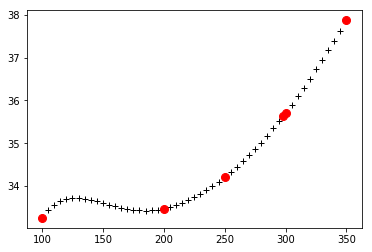

In [18]:
#更高阶的多项式插值，只需要将kind值设为相应的数字，
#但是只能取大于4的奇数了
T = np.arange(100,355,5)
cp_ch4 = interp1d(data['TK'],data['Cp'],kind = 5)
p = plt.plot(T,cp_ch4(T),'k+')
p  = plt.plot(data['TK'][1:7], data['Cp'][1:7], 'ro', markersize=8)

In [19]:
#对于二维乃至更高维度的多项式插值:
from scipy.interpolate import interp2d

Text(0.5,1,'高斯函数')

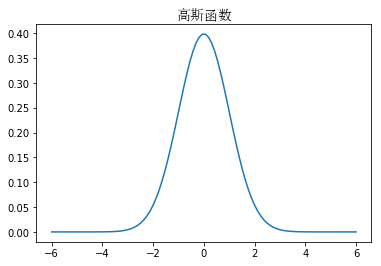

In [39]:
#gauss 函数作为径向基函数
x = np.linspace(-6,6,100)
plt.plot(x,(1 / np.sqrt(2*np.pi)) *np.exp(- x**2/2))
plt.title(u'高斯函数',fontproperties=font)

In [31]:
#Multiquadric 函数

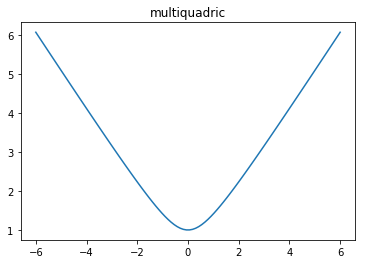

In [40]:
plt.plot(x,np.sqrt(1 + x**2))
t = plt.title('multiquadric')

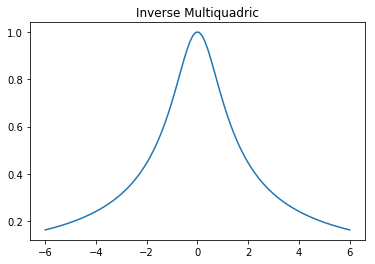

In [41]:
#inverse multiquadric函数
plt.plot(x, 1. / np.sqrt(1 + x **2))
t = plt.title("Inverse Multiquadric")

In [ ]:
#径向基函数插值,
f(x)=∑jnjΦ(∥x−xj∥)